In [59]:
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt

In [60]:
os.getcwd()

'c:\\Users\\miguel.ortiz\\Documents\\Doutorado\\Synthetic\\codes'

In [61]:
base_path = 'c:\\Users\\miguel.ortiz\\Documents\\Doutorado\\Synthetic\\'
data_path = 'dados\\'

In [62]:
def convert_to_week_start(week_str):
    year = int(week_str[:4])  
    week = int(week_str[4:])  
    return datetime.datetime.strptime(f'{year}-{week}-1', "%Y-%W-%w")


def plot_sales_by_model_and_color(df, model_id, item_color_id, target_column):
    filtered_df = df[(df['ModelID'] == model_id) & (df['ItemColorId'] == item_color_id)]
    
    # Agrupar por semana (Week) y sumar la cantidad vendida
    weekly_sales_filtered = filtered_df.groupby('Week')[target_column].sum()

    # Verificar si hay datos después de filtrar
    if weekly_sales_filtered.empty:
        print(f"No se encontraron datos para ModelID {model_id} y ItemColorId {item_color_id}.")
        return
    
    # Crear el gráfico de la serie temporal
    plt.figure(figsize=(10, 6))
    plt.plot(weekly_sales_filtered.index, weekly_sales_filtered.values, marker='o', linestyle='-')

    # Configurar el gráfico
    plt.title(f'Cantidad Vendida por Semana ({model_id}, {item_color_id})')
    plt.xlabel('Semana')
    plt.ylabel('Cantidad Vendida')
    plt.grid(True)
    plt.xticks(rotation=45)

    # Mostrar el gráfico
    plt.show()

In [27]:
prices = pd.read_parquet(base_path + data_path + 'prices.parquet')
sales = pd.read_parquet(base_path + data_path + 'sales.parquet')
stock = pd.read_parquet(base_path + data_path + 'stock.parquet')

In [28]:
prices = prices[['CeaWkId','StoreID', 'ModelID', 'ItemColorId', 'ListPrice', 'CurrentPrice', 'Cost']]
sales = sales[['CeaWkId','StoreID', 'ModelID', 'ItemColorId', 'Quantity']]
stock = stock[['CeaWkId','StoreID', 'ModelID', 'ItemColorId', 'StockPieces']]


In [29]:
df = prices.merge(sales, on = ['CeaWkId', 'StoreID', 'ModelID', 'ItemColorId']).merge(stock, on = ['CeaWkId', 'StoreID', 'ModelID', 'ItemColorId'])

In [30]:
df = df.dropna(subset=df.columns[df.isna().any()])


In [50]:
df[df['ModelID'] == '9993398']

,CeaWkId,StoreID,ModelID,ItemColorId,ListPrice,CurrentPrice,Cost,Quantity,StockPieces,Week
0,202325,606,9993398,BRANCO_1,59.99,29.99,15.6675,2,9,2023-06-19
14026,202327,606,9993398,BRANCO_1,59.99,29.99,15.6675,7,1,2023-07-03


In [33]:
df['Week'] = df['CeaWkId'].apply(convert_to_week_start)

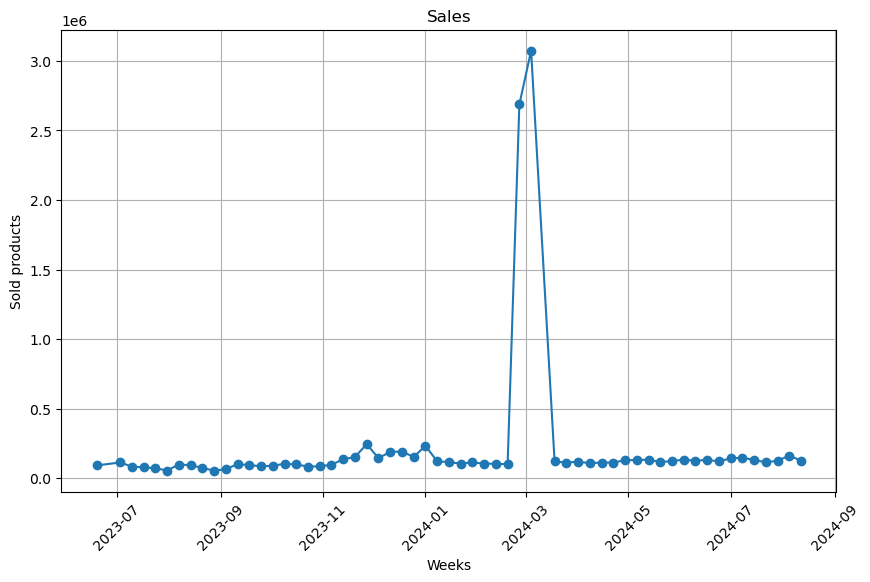

In [39]:


weekly_sales = df.groupby('Week')['Quantity'].sum()

plt.figure(figsize=(10, 6))
plt.plot(weekly_sales.index, weekly_sales.values, marker='o', linestyle='-')

plt.title('Sales')
plt.xlabel('Weeks')
plt.ylabel('Sold products')
plt.grid(True)
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()




In [53]:
# Paso 1: Identificar todas las semanas disponibles en el DataFrame
all_weeks = df['Week'].unique()

# Paso 2: Contar el número de semanas en las que aparece cada combinación de ModelID e ItemColorID
product_weeks = df.groupby(['ModelID', 'ItemColorId'])['Week'].nunique().reset_index()

# Paso 3: Filtrar los productos que aparecen en todas las semanas disponibles
products_with_all_weeks = product_weeks[product_weeks['Week'] == len(all_weeks)]

# Mostrar los productos que cumplen con el criterio
print(products_with_all_weeks)


       ModelID ItemColorId  Week
155    1000924    JEANS_CL    59
380    1002179        ROSA    59
383    1002187        AZUL    59
458    1002784  AZUL_MARIN    59
487    1003127    JEANS-MD    59
...        ...         ...   ...
50352  9999221    CARAMELO    59
50353  9999222   OFF_WHITE    59
50367  9999293        KAKI    59
50385  9999393    BRANCO_1    59
50386  9999395    BRANCO_1    59

[579 rows x 3 columns]


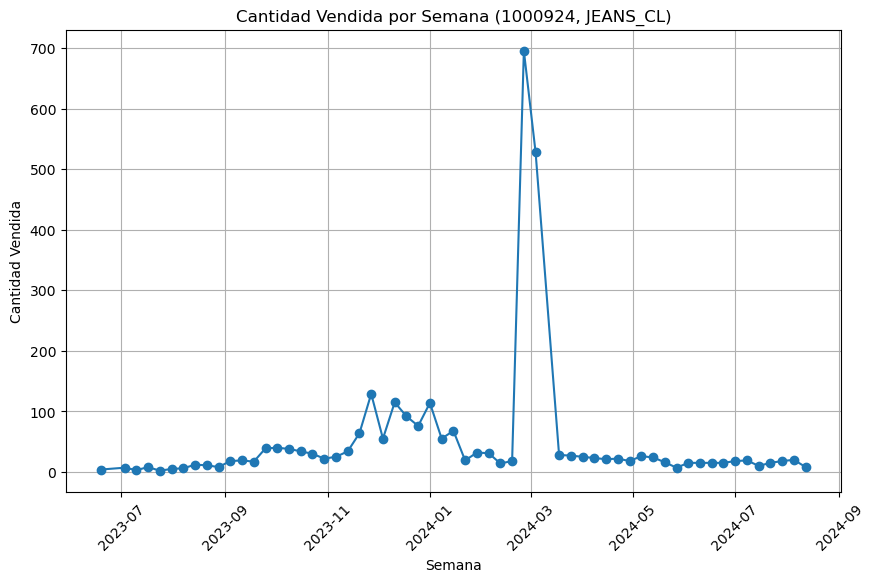

In [63]:
plot_sales_by_model_and_color(df, '1000924', 'JEANS_CL', 'Quantity')


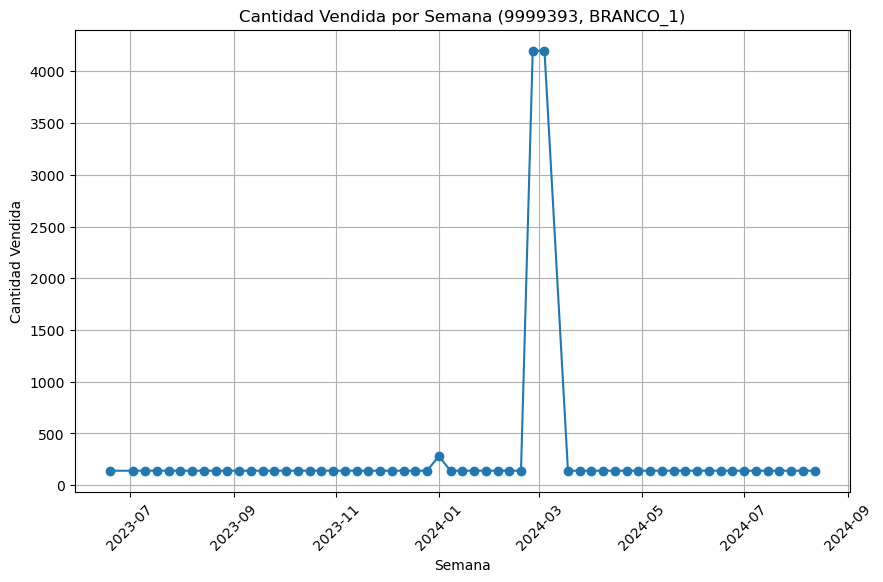

In [69]:
plot_sales_by_model_and_color(df, '9999393', 'BRANCO_1', 'ListPrice')

In [76]:
df.to_parquet(r'C:\Users\miguel.ortiz\Documents\Doutorado\Synthetic\dados\df_all.parquet')